# Data Extraction and Visualisation

## Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

sb.set(font_scale = 2)
plt.style.use('seaborn-v0_8-bright')
plt.rcParams['figure.dpi'] = 300

## Data Extraction

In [3]:
data = pd.read_csv('datasets/wine_quality.csv', sep=';')

In [4]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


All columns except for **quality** are numerical data as the integers represent how 'good' a wine is.

Hence, **quality** is an important variable for us to determine if a wine is good.

## Finding the Benchmark

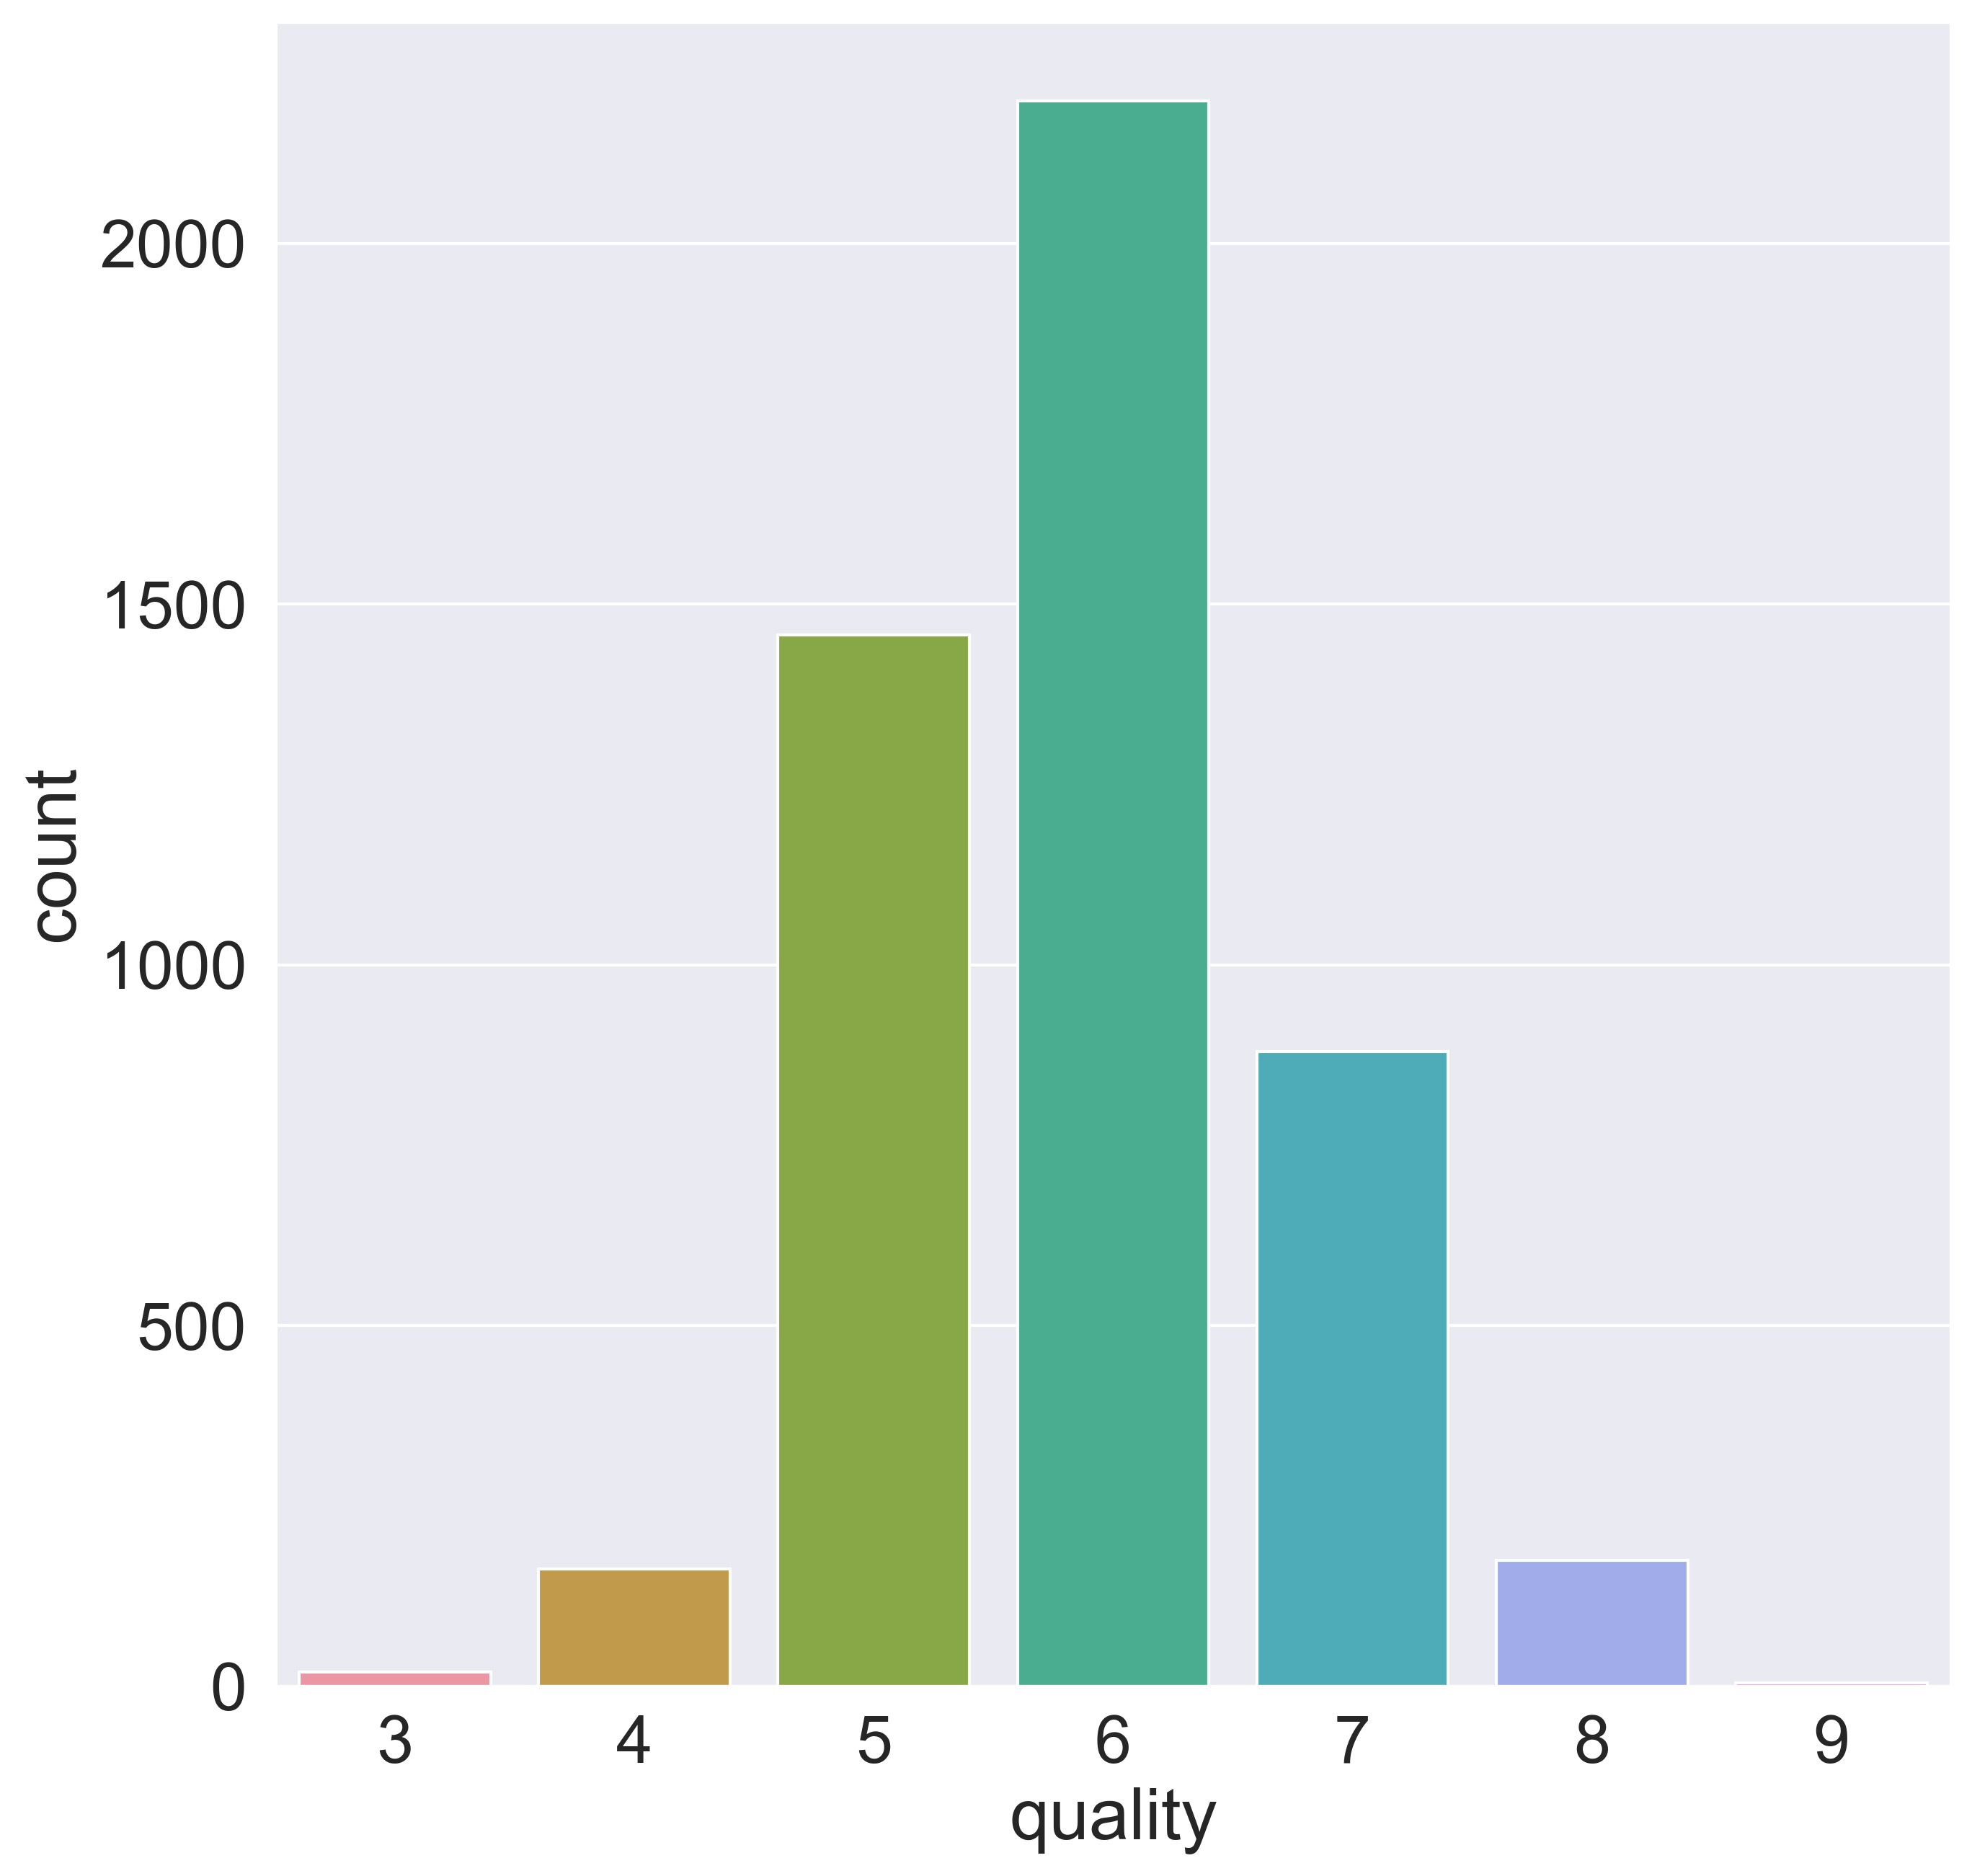

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [6]:
f = plt.figure(figsize = (10, 10))
sb.countplot(x = data['quality'])
plt.show()
print(data['quality'].value_counts())

In [7]:
def find_percentage(data, quality):
    percentage = len(data[data['quality'] >= quality].index) / len(data)
    print(f'Percentage of wine with quality >= {quality}: {percentage:.0%}')

find_percentage(data, 6)
find_percentage(data, 7)
find_percentage(data, 8)

Percentage of wine with quality >= 6: 67%
Percentage of wine with quality >= 7: 22%
Percentage of wine with quality >= 8: 4%


From the calculations above, the minimum quality for a wine to be good should be 7 as 6 includes more than half of the data, while 8 contains too little.

## Visualisation of Numerical Attributes

In [8]:
numericalData = data.copy()
numericalData.drop(columns = 'quality', inplace = True)
numericalData

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

In [13]:
f, axes = plt.subplots(6, 2, figsize = (20, 50))
for i, col in enumerate(numericalData.columns):
    ax = axes[int(i / 2)][i % 2]
    sb.histplot(data = data[col], kde = True, ax = ax)
    ax.lines[0].set_color('red')

## Comparing Numerical Attributes with quality

### Distribution

In [24]:
f, axes = plt.subplots(11, 1, figsize = (30, 120))
for i, col in enumerate(numericalData.columns):
    sb.boxplot(data = data, x = col, y = 'quality', orient = 'h', ax = axes[i])
plt.show()

### Correlation

In [29]:
f, axes = plt.subplots(6, 2, figsize = (20, 50))
for i, col in enumerate(numericalData.columns):
    ax = axes[int(i / 2)][i % 2]
    joint = pd.concat([data[col], data['quality']], axis = 1)
    sb.heatmap(joint.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {'size': 20}, ax = ax)
plt.show()

It is difficult to make any conclusion from the above comparision, as individual attributes have low correlation with the quality of wine.